<h1 style="color: white; padding: 10px;">
    PEMODELAN REGRESI LOGISTIK
</h1>

In [102]:
import pandas as pd

filetidur = r"D:\Adrian's file\Universitas Brawijaya\SEM2\Metode Sains Data I\Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(filetidur, delimiter=',', encoding='utf-8')

In [103]:
df['BMI Category'].replace({'Normal':0, 'Normal Weight':1, 'Overweight':2, 'Obese':3}, inplace=True)
df['Sleep Disorder'].fillna('Tidak Ada', inplace=True)

df[['Sistole', 'Diastole']] = df['Blood Pressure'].str.split('/', expand=True)

df['Sistole'] = df['Sistole'].astype(float)
df['Diastole'] = df['Diastole'].astype(float)

def kategorikan_tekanan_darah(tekanan_sistolik, tekanan_diastolik):
    if tekanan_sistolik < 90 or tekanan_diastolik < 60:
        return "Sangat Rendah"
    elif (90 <= tekanan_sistolik < 120) and (60 <= tekanan_diastolik < 80):
        return "Rendah"
    elif (120 <= tekanan_sistolik < 140) or (80 <= tekanan_diastolik < 90):
        return "Sedang"
    elif (140 <= tekanan_sistolik < 160) or (90 <= tekanan_diastolik < 100):
        return "Tinggi"
    else:
        return "Sangat Tinggi"
    
df['BPcat'] = df.apply(lambda row: kategorikan_tekanan_darah(row['Sistole'], row['Diastole']), axis=1)
df['BPcat'].replace({'Sangat Rendah':1, 'Rendah':2, 'Sedang':3, 'Tinggi':4, 'Sangat Tinggi':5}, inplace=True)

df['BMI Category'] = df['BMI Category'].astype('category')
df['BPcat'] = df['BPcat'].astype('category')

df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sistole,Diastole,BPcat
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,Tidak Ada,126.0,83.0,3
1,2,Male,28,Doctor,6.2,6,60,8,0,125/80,75,10000,Tidak Ada,125.0,80.0,3
2,3,Male,28,Doctor,6.2,6,60,8,0,125/80,75,10000,Tidak Ada,125.0,80.0,3
3,4,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,140.0,90.0,4
4,5,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,140.0,90.0,4
5,6,Male,28,Software Engineer,5.9,4,30,8,3,140/90,85,3000,Insomnia,140.0,90.0,4
6,7,Male,29,Teacher,6.3,6,40,7,3,140/90,82,3500,Insomnia,140.0,90.0,4
7,8,Male,29,Doctor,7.8,7,75,6,0,120/80,70,8000,Tidak Ada,120.0,80.0,3
8,9,Male,29,Doctor,7.8,7,75,6,0,120/80,70,8000,Tidak Ada,120.0,80.0,3
9,10,Male,29,Doctor,7.8,7,75,6,0,120/80,70,8000,Tidak Ada,120.0,80.0,3


In [104]:
features_cols = ['Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'BPcat']
X = df[features_cols]
X.head(2)

,Quality of Sleep,Physical Activity Level,BMI Category,BPcat
0,6,42,2,3
1,6,60,0,3


In [105]:
Y = df['Sleep Disorder']
Y.head(2)

0    Tidak Ada
1    Tidak Ada
Name: Sleep Disorder, dtype: object

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='newton-cg', random_state=16, max_iter=100000)

In [108]:
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=100000, multi_class='multinomial', random_state=16,
                   solver='newton-cg')

In [109]:
print('Koefisien Model:', logreg.coef_)
print('\nIntersep Model:', logreg.intercept_)

Koefisien Model: [[-0.04372835 -0.03596508  0.88117969 -0.67561348]
 [-0.17840417  0.02868124  0.31198797  1.50936156]
 [ 0.22213252  0.00728384 -1.19316766 -0.83374809]]

Intersep Model: [ 3.2045399  -5.98273605  2.77819615]


In [110]:
koefisien = logreg.coef_

print('Koefisien Insomnia:')
for features_cols, coef in zip(X.columns, koefisien[0]):
    print(f'{features_cols:>25}: {coef:0.4f}')

print('\nKoefisien Sleep Apnea:')
for features_cols, coef in zip(X.columns, koefisien[1]):
    print(f'{features_cols:>25}: {coef:0.4f}')

print('\nKoefisien Tidak Ada:')
for features_cols, coef in zip(X.columns, koefisien[2]):
    print(f'{features_cols:>25}: {coef:0.4f}')

Koefisien Insomnia:
         Quality of Sleep: -0.0437
  Physical Activity Level: -0.0360
             BMI Category: 0.8812
                    BPcat: -0.6756

Koefisien Sleep Apnea:
         Quality of Sleep: -0.1784
  Physical Activity Level: 0.0287
             BMI Category: 0.3120
                    BPcat: 1.5094

Koefisien Tidak Ada:
         Quality of Sleep: 0.2221
  Physical Activity Level: 0.0073
             BMI Category: -1.1932
                    BPcat: -0.8337


In [111]:
Y_pred = logreg.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_Test, Y_pred)
cnf_matrix

array([[14,  1,  1],
       [ 5, 10,  1],
       [ 3,  0, 40]], dtype=int64)

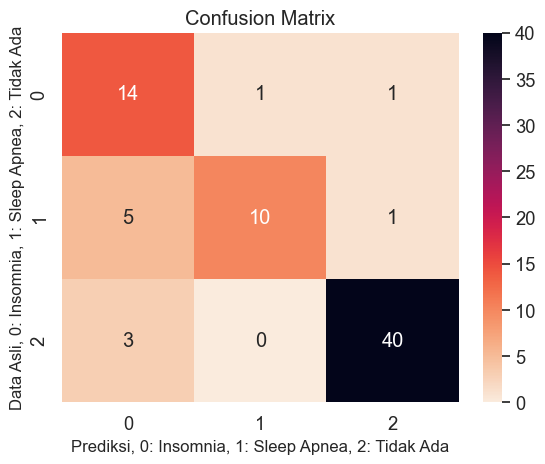

<Figure size 1000x700 with 0 Axes>

In [112]:
matrix = pd.DataFrame(cnf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
axis = plt.axes()
plt.figure(figsize=(10, 7))
axis.set_title('Confusion Matrix')
sns.heatmap(matrix, annot=True, fmt='g', ax=axis,cmap="rocket_r")
axis.set_xlabel('Prediksi, 0: Insomnia, 1: Sleep Apnea, 2: Tidak Ada', fontsize = 12)
axis.set_ylabel('Data Asli, 0: Insomnia, 1: Sleep Apnea, 2: Tidak Ada', fontsize = 12)
plt.show()

In [113]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_pred))

              precision    recall  f1-score   support

    Insomnia       0.64      0.88      0.74        16
 Sleep Apnea       0.91      0.62      0.74        16
   Tidak Ada       0.95      0.93      0.94        43

    accuracy                           0.85        75
   macro avg       0.83      0.81      0.81        75
weighted avg       0.88      0.85      0.85        75



In [114]:
import numpy as np
ab = pd.DataFrame(logreg.predict_proba(X_test), columns=logreg.classes_)

ab['sum'] = ab.sum(axis=1)
ab['Prediksi'] = Y_pred
ab['Data Asli'] = Y_Test.to_frame().reset_index().drop(columns='index')
ab['Kebenaran Prediksi'] = np.where(ab['Prediksi'] == ab['Data Asli'], 'Benar', 'Salah')

ab.head(20)

,Insomnia,Sleep Apnea,Tidak Ada,sum,Prediksi,Data Asli,Kebenaran Prediksi
0,0.057401,0.008542,0.934056,1.0,Tidak Ada,Tidak Ada,Benar
1,0.116928,0.026064,0.857008,1.0,Tidak Ada,Tidak Ada,Benar
2,0.116928,0.026064,0.857008,1.0,Tidak Ada,Tidak Ada,Benar
3,0.057401,0.008542,0.934056,1.0,Tidak Ada,Tidak Ada,Benar
4,0.116928,0.026064,0.857008,1.0,Tidak Ada,Tidak Ada,Benar
5,0.709402,0.133582,0.157016,1.0,Insomnia,Insomnia,Benar
6,0.116928,0.026064,0.857008,1.0,Tidak Ada,Tidak Ada,Benar
7,0.018312,0.002439,0.979249,1.0,Tidak Ada,Tidak Ada,Benar
8,0.057401,0.008542,0.934056,1.0,Tidak Ada,Tidak Ada,Benar
9,0.020904,0.024754,0.954342,1.0,Tidak Ada,Tidak Ada,Benar


In [115]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_Test,Y_pred)
print(f'Akurasi model : {accuracy * 100:.2f}%')

Akurasi model : 85.33%
